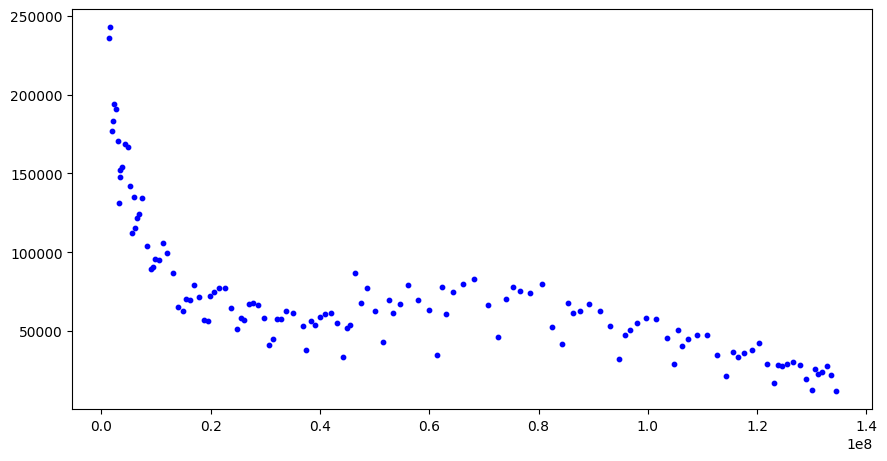

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.style.use('default')

covid_df=pd.read_csv('data/covid_df.csv', sep=';')

us_data = covid_df[covid_df['country'] == 'United States']


'''     Построение диаграммы рассеивания       '''


fig = plt.figure(figsize=(8, 4))# сначала создаётся объект фигуры(fig), содержащий необходимую информацию и настройки, например размер в дюймах(figsize, восемь дюймов в ширину, четыре — в высоту)
axes = fig.add_axes([0, 0, 1, 1])# с помощью метода add_axes() добавляется координатная плоскость, необходимо указать её расположение на фигуре, exmpl. начинается в левом нижнем углу 
                                 # без отступов (координаты 0, 0) и занимает всё отведённое место в области (100%, ширина и высота равны 1)
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'],   # x, y — последовательности, которые будут отложены по осям абсцисс и ординат;
    s=10,                           # s — размер маркеров
    marker='o',                     # marker — вид маркеров ('o' — точки, '^' — треугольники);
    c = 'blue'                      # c — цвет маркеров.
);

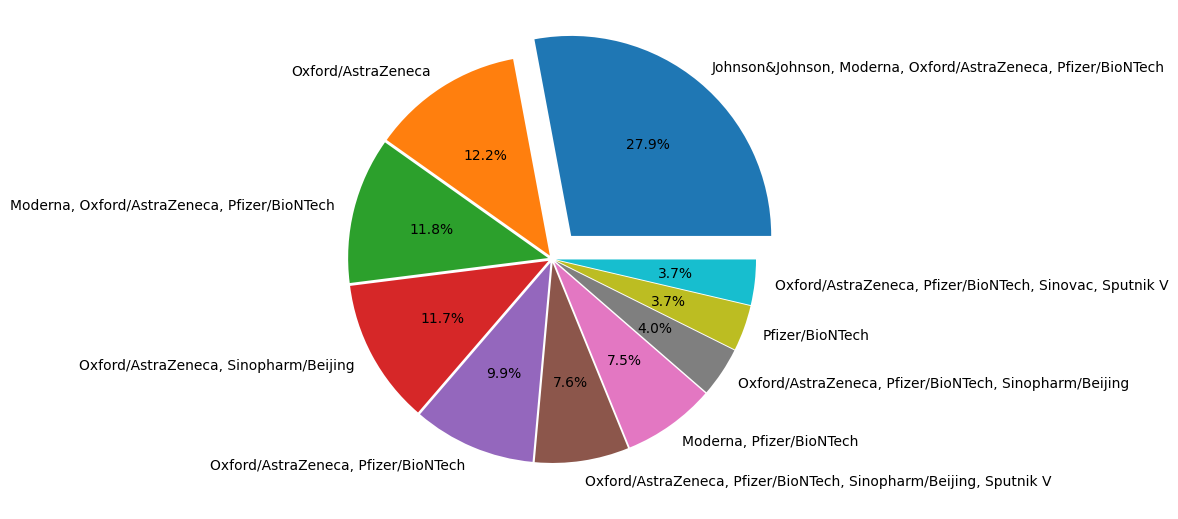

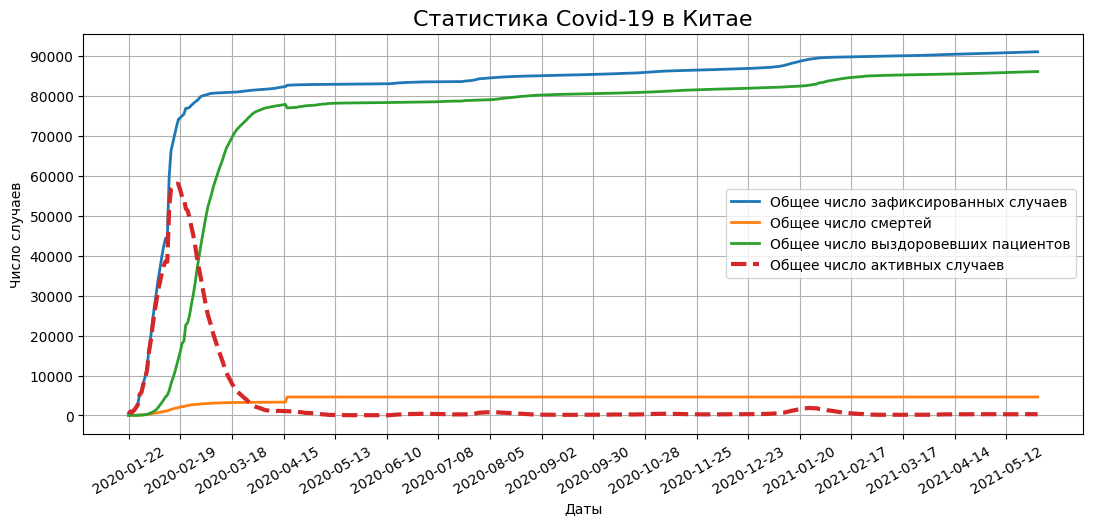

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('default')
covid_df=pd.read_csv('data/covid_df.csv', sep=';')

'''         Построение круговой диаграммы           '''

'''  
Основные параметры метода pie()

        x — значения, по которым будет строиться круговая диаграмма;
        labels — метки, соответствующие значениям;
        autopct — формат отображения долей на диаграмме (например, '%.1f%%' означает, что округление будет производиться до первого знака после запятой и при выводе будет указан знак "%"; открывающий и закрывающий проценты означают форматирование, а внутренний — вывод знака "%");
        explode — последовательность, которая определяет долю смещения сектора от центра для каждого значения из x.

'''
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.15, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]
);



'''     Построение информативных линейных графиков      '''

china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=2)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=2)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=2)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.set_xticks(range(0, 500, 28))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

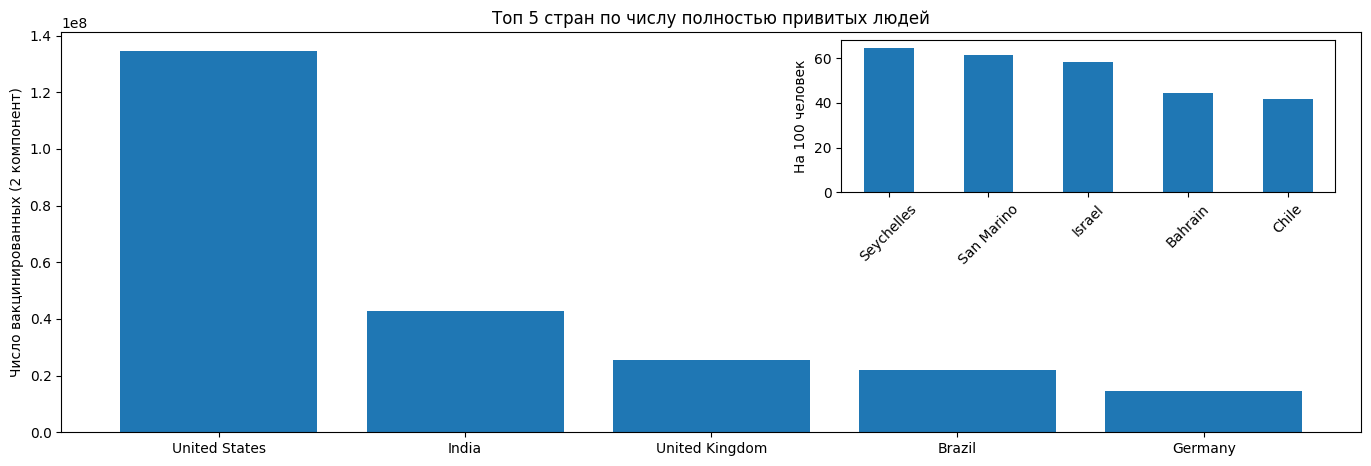

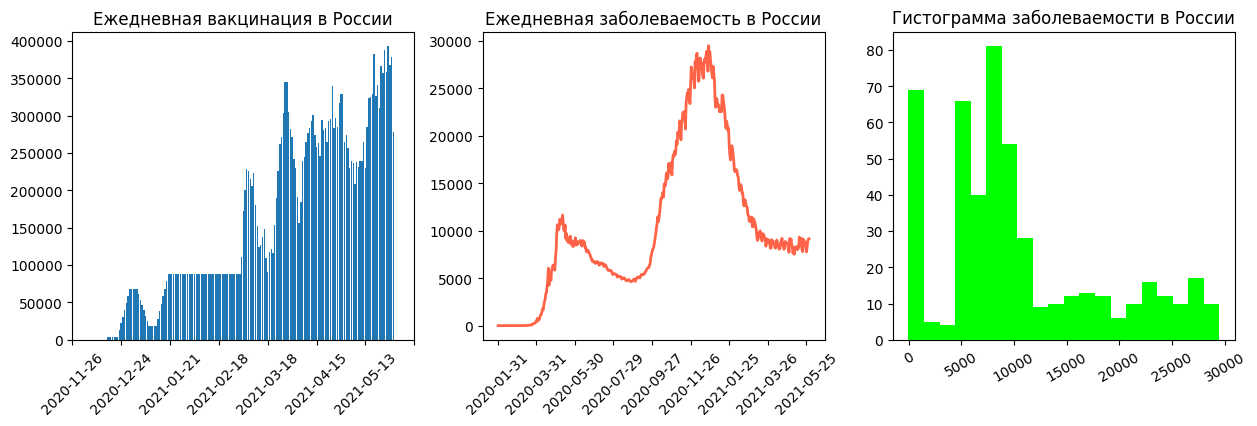

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('default')
covid_df=pd.read_csv('data/covid_df.csv', sep=';')

'''        Пример использования нескольких систем координат на одном графике      '''
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)




'''     Нексолько графиков на одной фигуре      '''
russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].set_xticks(range(300, 500, 28))
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].set_xticks(range(0, 500, 60))
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)